In [3]:
#Cell to import libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Part A: Solving differential equation using Euler method

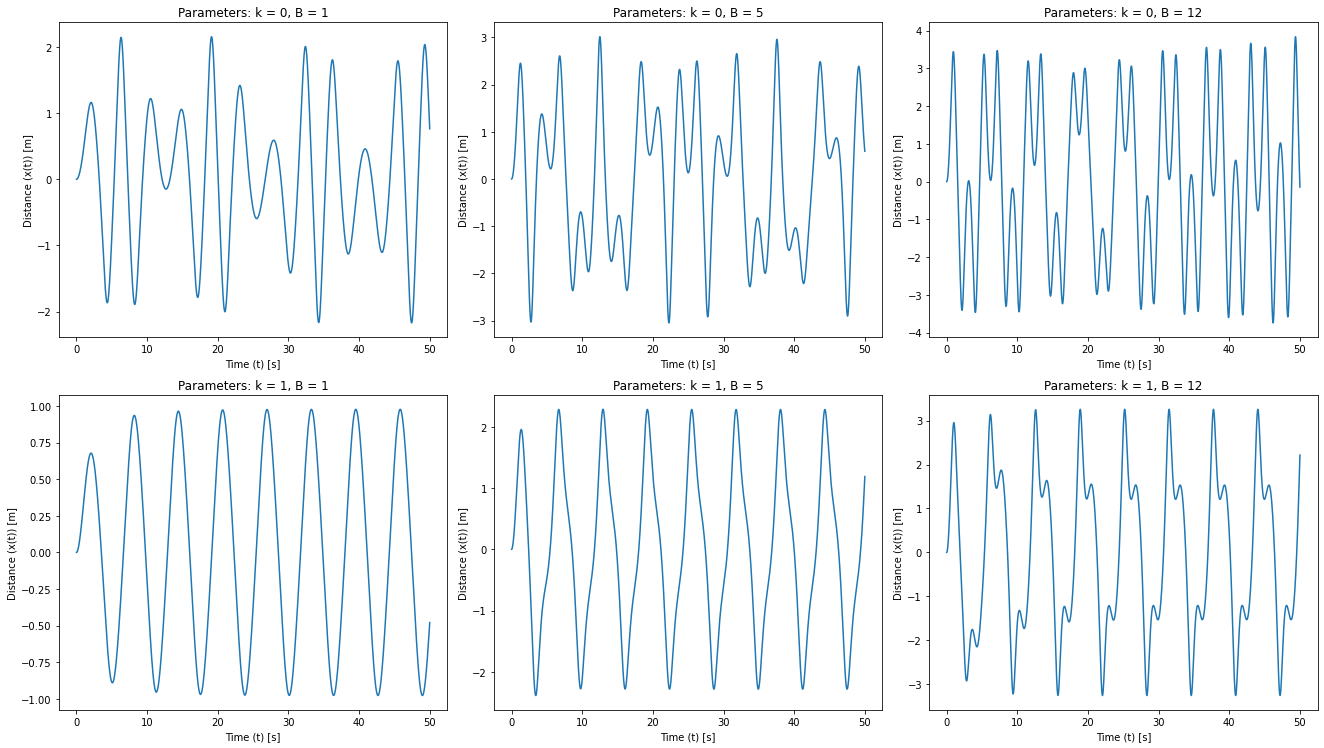

In [47]:
k = [0, 1]
B = [1, 5, 12]


#dv/dt = Bcos(t) - kv - x^3
def get_a(x, v, t, B, k):
    return B * np.cos(t) - k * v - np.power(x, 3)


def solve_by_euler(k, B, N, tau):
    #single derivatives, initial value = 0 (assumption)
    v = [0]
    #function values
    x = [0]
    #double derivatives, initial value = 0 (assumption)
    a = [get_a(x[0], v[0], 0, B, k)]
    
    for t in range(0, N - 1):
        x_current = x[t]
        v_current = v[t]
        a_current = a[t]
    
        #Performing Euler algorithm step
        v_new = v_current + tau * a_current
        x_new = x_current + tau * v_current
        
        #Appending new parameters to the tracking list
        x.append(x_new)
        v.append(v_new)
        a.append(get_a(x_new, v_new, (t + 1) * tau, B, k))
        
    
    return np.array(x)

#Step size
tau = 0.001
#Number of steps
N = 50000
#Time
t = [n * 0.001 for n in range(N)]\

fig, axs = plt.subplots(2, 3)

#Here, computing and plotting solutions for differential equations
for i in range(len(k)):
    for j in range(len(B)):
        k_current = k[i]
        B_current = B[j]
        x = solve_by_euler(k_current, B_current, N, tau)
        
        axs[i, j].plot(t, x)
        axs[i, j].set_title(f'Parameters: k = {k_current}, B = {B_current}')
        axs[i, j].set_xlabel('Time (t) [s]')
        axs[i, j].set_ylabel('Distance (x(t)) [m]')

fig.set_size_inches(18.5, 10.5)        
fig.tight_layout()

# Part B Determining the spectra

In [ ]:
def compute_coefficient(points, index, N):
    return sum([points[k] * np.exp(-1j * 2 * np.pi * k * index / N) for k in range(len(points))])


def DFT(func, start, end, N = 1000):
    delta_t = (end - start) / (N - 1)
    points = np.arange(start, end, step=delta_t)
    sample_points = func(points)
    
    return np.array([compute_coefficient(sample_points, i, N) for i in range(len(sample_points))])

